# Titanic

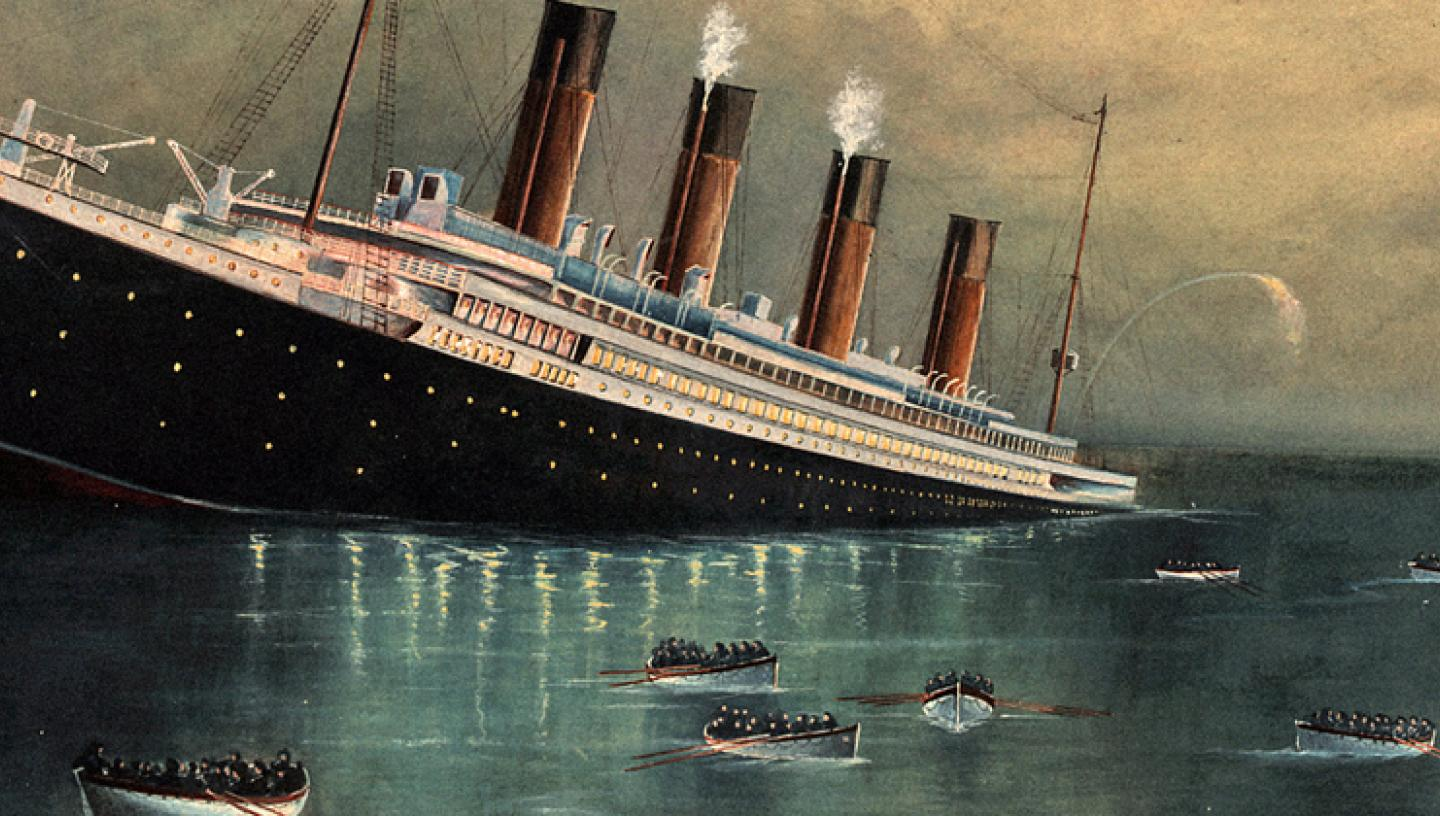

In [1]:
from IPython.display import Image, display
display(Image(filename='TheTitanic.jpg'))


This is an analysis ML model to predict the survival chance of an individual on the Titanic based on their attributes such as gender, age and family status

Data was gathered from Kaggle's competition

https://www.kaggle.com/competitions/titanic

Results - Top 25% percentile

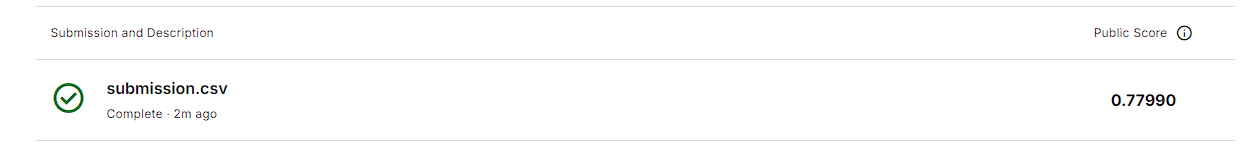

In [2]:
display(Image(filename='Results.png'))

### Imports

Importing all needed libraries for the project

In [3]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os


from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc

# import sklearn and load boston dataset
import sklearn
from sklearn import datasets

# Needed for training
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Needed for hypertuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import pandas as pd

# imort seaborn and draw regression joint plot
import seaborn as sns

#import model_selection and split to train and test
from sklearn import model_selection

# import linear_model and train with NE
from sklearn import linear_model

# import metrics and calculate MSE and RMSE
from sklearn import metrics

# import pipeline and preprocessing from sklearn, standardize the features
# and run SGD on the data
from sklearn import pipeline, preprocessing

# Needed for normalizing some columns later
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [4]:
# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20, 10)

### Reading the data

Reading the data off the excel files downloaded from kaggle and saving them in dataframes using Pandas

In [5]:
# Creating copies of the objects for modification
original_train_data = pd.read_csv('train.csv')
train_df = original_train_data.copy()

original_test_data = pd.read_csv('test.csv')
test_df = original_test_data.copy()

original_gender_submission = pd.read_csv('gender_submission.csv')
gender_submission = original_gender_submission.copy()

### Inspecting the data

I am taking an initial look at the data in order to dump the columns which I feel like have colleration to survival

In [6]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Dropping columns of PassengerId, Name and Ticket as there is likely no correlation between the 2, and the survival column

train_df.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Name'], axis=1, inplace=True)

# Not dropping PassengerId off the test df, as it's needed later

In [8]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [9]:
# Checking for missing values
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# I see that Cabin is missing too many values to be useful, and therefore I am dropping it

train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

Age is a numeric value, so I can set the missing ages to the average, same goes for Fare, As for Embarked, the amount of values missing are miniscule and therefore I can set them to the most common value without corrupting the data too much

In [12]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])


### Analysing the data

Now we will draw graphs to compare the relationship between different columns, and the survive column

In [13]:
# plot the connection between 2 features - function taken off Kaggle's toturial
def plot_connection_between_2_features(df,
                                       feature_1_name,
                                       feature_2_name):
    df.plot.scatter(x=feature_1_name,
                    y=feature_2_name,
                    title=f'{feature_1_name} by {feature_2_name}')

#plot_connection_between_2_features(train_df, 'Age', 'Survived')
#plot_connection_between_2_features(train_df, 'Fare', 'Survived')
#plot_connection_between_2_features(train_df, 'Sex', 'Survived')
#plot_connection_between_2_features(train_df, 'SibSp', 'Survived')
#plot_connection_between_2_features(train_df, 'Parch', 'Survived')
#plot_connection_between_2_features(train_df, 'Embarked', 'Survived')

# This is a terrible way to compare a boolean value ('Survived') with non-boolean values, and therefore commented out

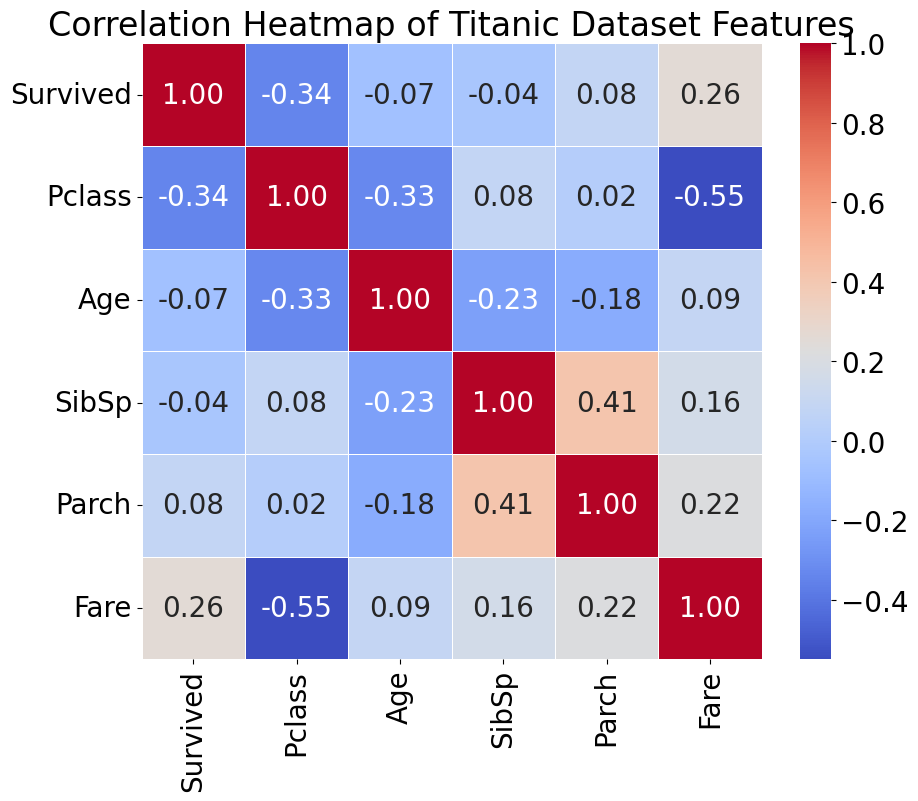

In [14]:
temp_train_df = train_df.drop(['Sex', 'Embarked'], axis=1)

# Compute the correlation matrix
corr = temp_train_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Titanic Dataset Features')

# Show the plot
plt.show()

Taking another look at the Dataframe

In [15]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [16]:
# Let's convert the Embarked category to hot encoding 

train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,male,22.000000,1,0,7.2500,False,True
1,1,1,female,38.000000,1,0,71.2833,False,False
2,1,3,female,26.000000,0,0,7.9250,False,True
3,1,1,female,35.000000,1,0,53.1000,False,True
4,0,3,male,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,False,True
887,1,1,female,19.000000,0,0,30.0000,False,True
888,0,3,female,29.699118,1,2,23.4500,False,True
889,1,1,male,26.000000,0,0,30.0000,False,False


In [17]:
# Now we will also Label Encode the Sex column, since it only has 2 categories we can convert it to binary value
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,1,38.000000,1,0,71.2833,False,False
2,1,3,1,26.000000,0,0,7.9250,False,True
3,1,1,1,35.000000,1,0,53.1000,False,True
4,0,3,0,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,True
887,1,1,1,19.000000,0,0,30.0000,False,True
888,0,3,1,29.699118,1,2,23.4500,False,True
889,1,1,0,26.000000,0,0,30.0000,False,False


### Lastly, we will normalize the Age and Fare columns

First we will take a look at the distribution of both columns in order to choose the correct scaler

<Axes: xlabel='Age', ylabel='Count'>

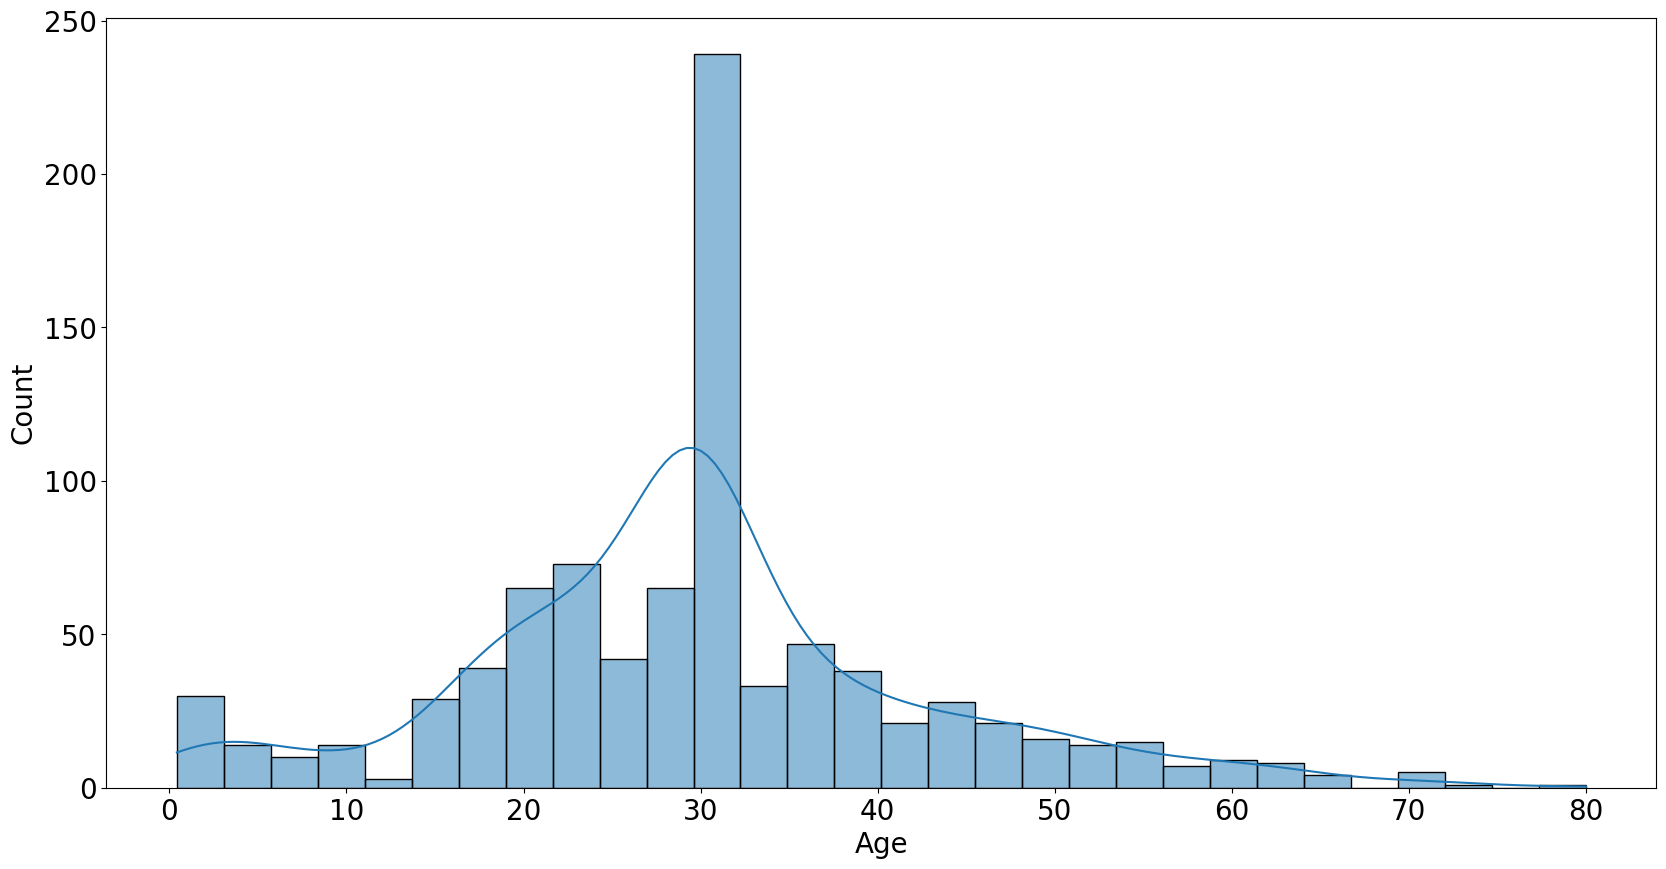

In [18]:
# Starting with Age

sns.histplot(train_df['Age'], kde=True)

Train Dataframe - 
     Survived  Pclass  Sex       Age  SibSp  Parch     Fare  Embarked_Q  \
0           0       3    0  0.271174      1      0   7.2500       False   
1           1       1    1  0.472229      1      0  71.2833       False   
2           1       3    1  0.321438      0      0   7.9250       False   
3           1       1    1  0.434531      1      0  53.1000       False   
4           0       3    0  0.434531      0      0   8.0500       False   
..        ...     ...  ...       ...    ...    ...      ...         ...   
886         0       2    0  0.334004      0      0  13.0000       False   
887         1       1    1  0.233476      0      0  30.0000       False   
888         0       3    1  0.367921      1      2  23.4500       False   
889         1       1    0  0.321438      0      0  30.0000       False   
890         0       3    0  0.396833      0      0   7.7500        True   

     Embarked_S  
0          True  
1         False  
2          True  
3       

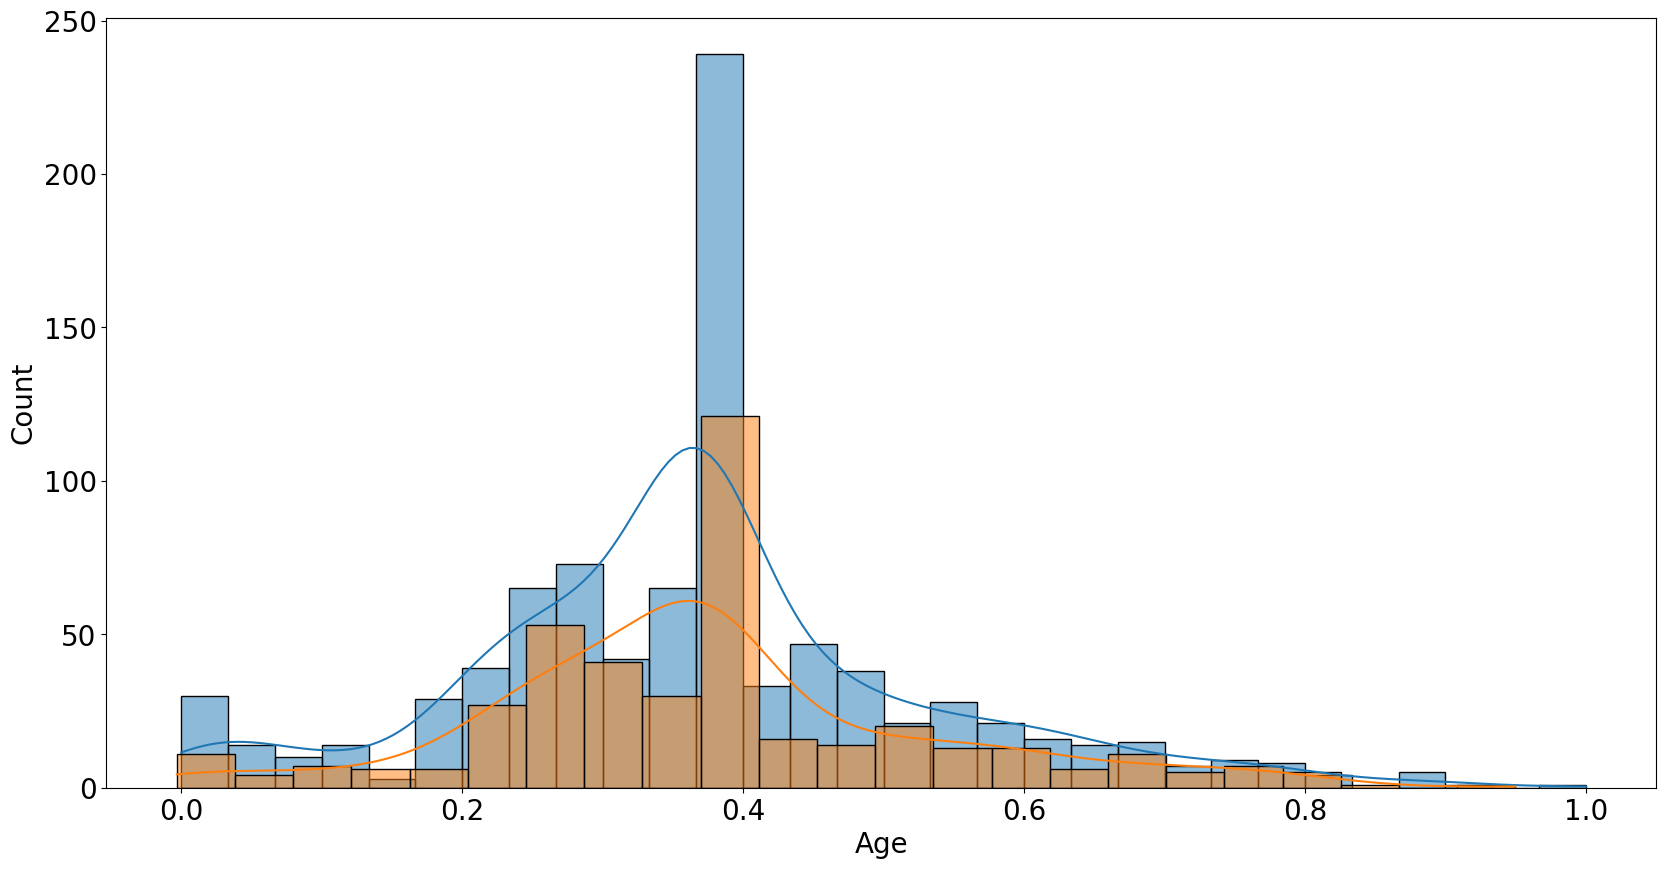

In [19]:
# The age has a clear range and doesn't seem to have extreme outliers, therefore we will use min-max scaling
# We will save the scaler to variable age_min_max_scaler in order to later apply it to new data

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(train_df[['Age']])

# I often run the entire notebook from start to finish, so if I do, to be safe, I delete the old scaler
if os.path.exists('age_min_max_scaler.pkl'):
    os.remove('age_min_max_scaler.pkl')

joblib.dump(scaler, 'age_min_max_scaler.pkl')

train_df['Age'] = data_scaled

print('Train Dataframe - ')
sns.histplot(train_df['Age'], kde=True)
print(train_df)

# Applying the same scaler to the test dataframe
# Not needed to load the scaler again, doing so for testing the file
scaler = joblib.load('age_min_max_scaler.pkl')

test_data_scaled = scaler.transform(test_df[['Age']])

test_df['Age'] = test_data_scaled

print('Test Dataframe - ')
sns.histplot(test_df['Age'], kde=True)
print(test_df)

<Axes: xlabel='Fare', ylabel='Count'>

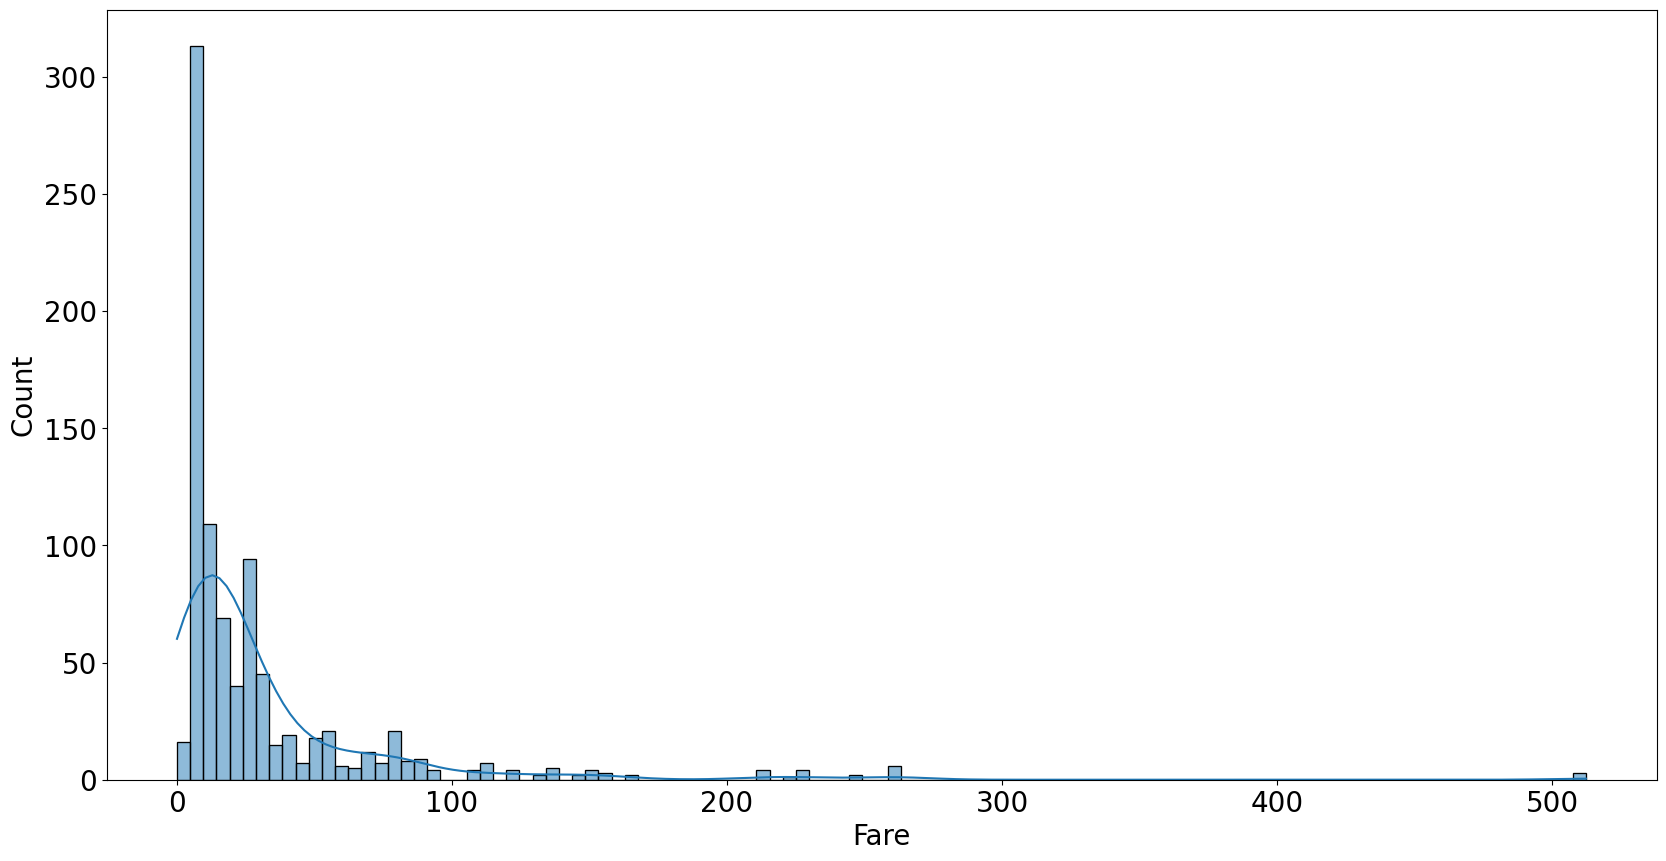

In [20]:
# Now we will normalize the Fare column
# First will take a look at it's values with histplot

sns.histplot(train_df['Fare'], kde=True)

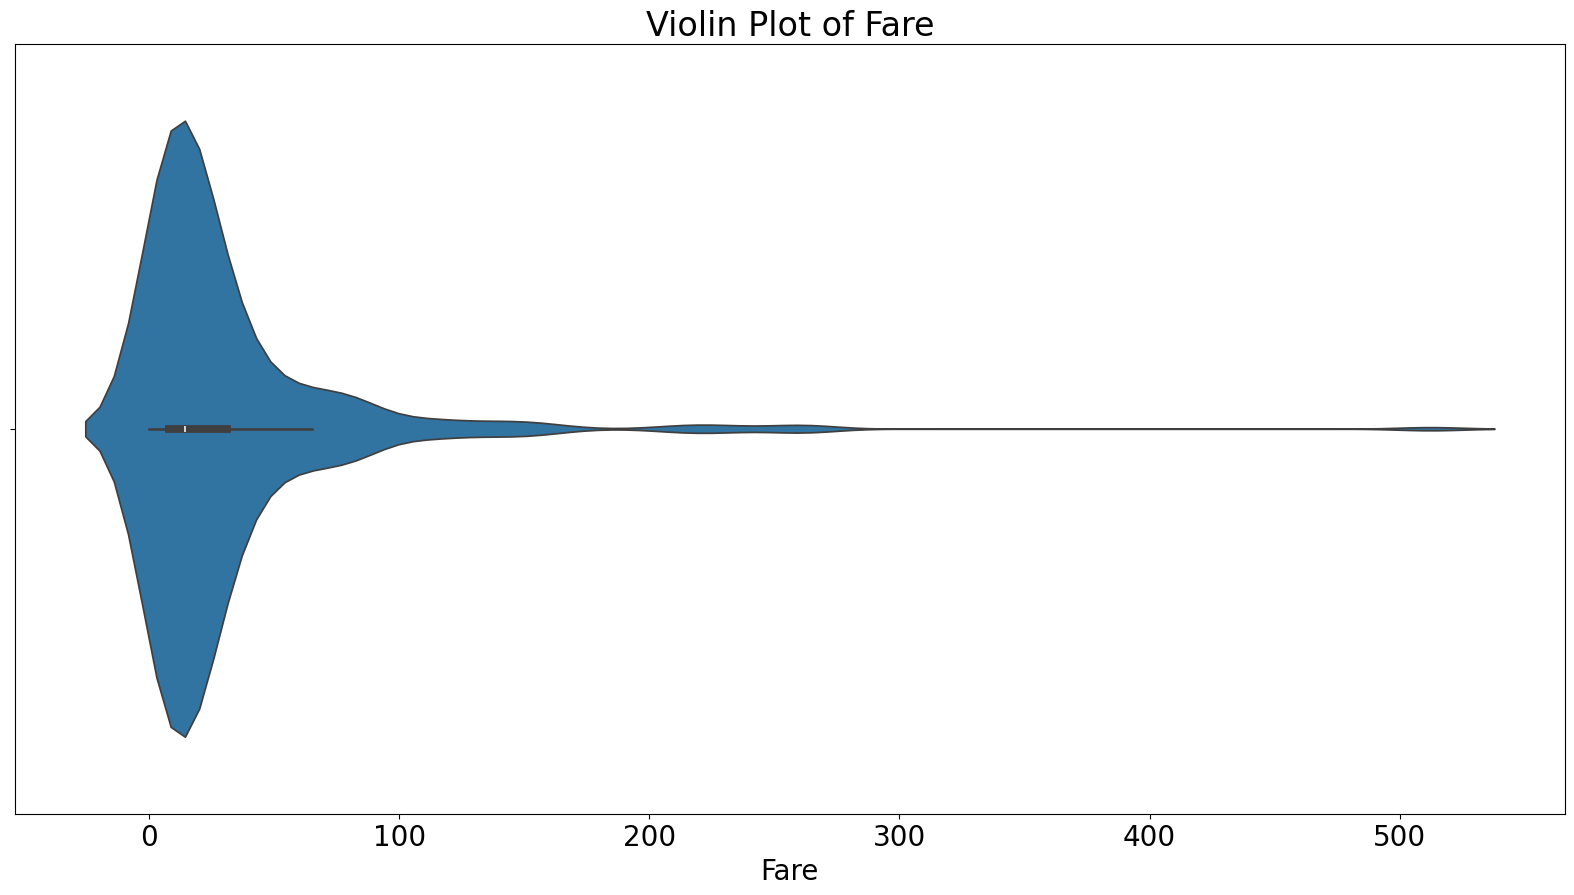

In [21]:
sns.violinplot(x=train_df['Fare'])
plt.title('Violin Plot of Fare')
plt.xlabel('Fare')
plt.show()

Train Dataframe - 
     Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0           0       3    0  0.271174      1      0 -0.312011       False   
1           1       1    1  0.472229      1      0  2.461242       False   
2           1       3    1  0.321438      0      0 -0.282777       False   
3           1       1    1  0.434531      1      0  1.673732       False   
4           0       3    0  0.434531      0      0 -0.277363       False   
..        ...     ...  ...       ...    ...    ...       ...         ...   
886         0       2    0  0.334004      0      0 -0.062981       False   
887         1       1    1  0.233476      0      0  0.673281       False   
888         0       3    1  0.367921      1      2  0.389604       False   
889         1       1    0  0.321438      0      0  0.673281       False   
890         0       3    0  0.396833      0      0 -0.290356        True   

     Embarked_S  
0          True  
1         False  
2          Tru

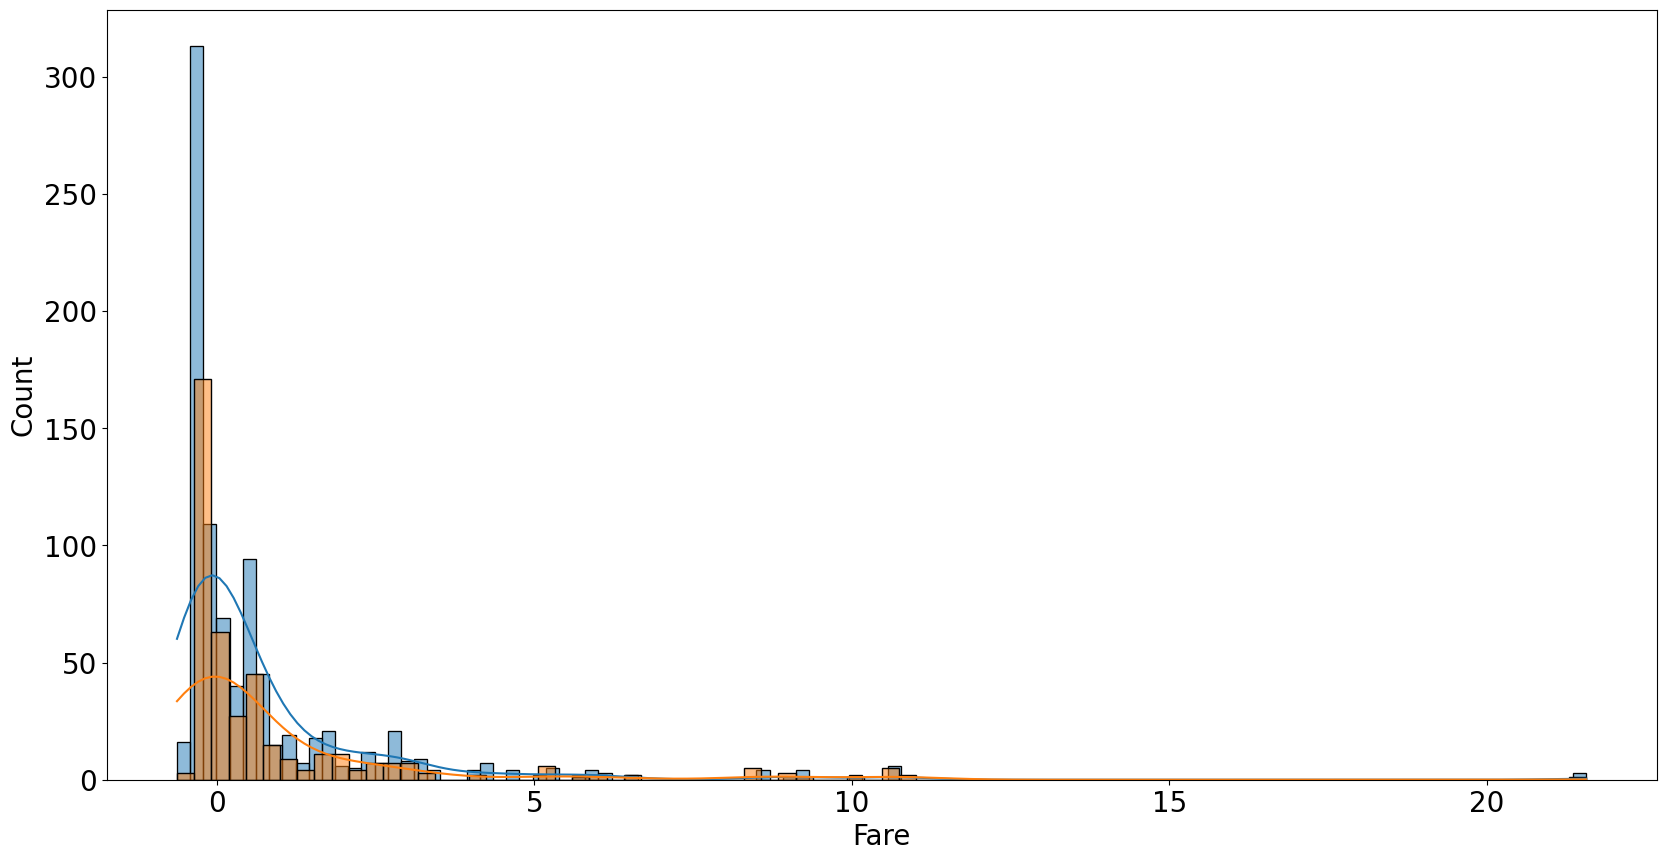

In [22]:
# Looks like the Fare column has many entries in the 0-100 range, with a few outliers reaching anywhere between 200-600, so we will use 

# The age has a clear range and doesn't seem to have extreme outliers, therefore we will use min-max scaling
# We will save the scaler to variable age_min_max_scaler in order to later apply it to new data

scaler = RobustScaler()
data_scaled = scaler.fit_transform(train_df[['Fare']])

# I often run the entire notebook from start to finish, so if I do, to be safe, I delete the old scaler
if os.path.exists('fare_min_max_scaler.pkl'):
    os.remove('fare_min_max_scaler.pkl')

joblib.dump(scaler, 'fare_min_max_scaler.pkl')

train_df['Fare'] = data_scaled

print('Train Dataframe - ')
sns.histplot(train_df['Fare'], kde=True)
print(train_df)

# Applying the same scaler to the test dataframe
# Not needed to load the scaler again, doing so for testing the file
scaler = joblib.load('fare_min_max_scaler.pkl')

test_data_scaled = scaler.transform(test_df[['Fare']])

test_df['Fare'] = test_data_scaled

print('Test Dataframe - ')
sns.histplot(test_df['Fare'], kde=True)
print(test_df)

### SibSp and Parch
SibSp - Amount of same-generation relatives a passenger as, such as spouse, brothers and sisters
Parch - Amount of different-generation relatives a passenger as, such as parents and kids

Since those are already numerical values with hierchy (meaning, 2>1 for example), we will keep them as is

Instead, we will create 2 new columns that will help us further use the family status of the individual - FamilySize and IsAlone

In [23]:
# Family Size - 
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df['IsAlone'] = train_df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
test_df['IsAlone'] = test_df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

print(train_df)

     Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0           0       3    0  0.271174      1      0 -0.312011       False   
1           1       1    1  0.472229      1      0  2.461242       False   
2           1       3    1  0.321438      0      0 -0.282777       False   
3           1       1    1  0.434531      1      0  1.673732       False   
4           0       3    0  0.434531      0      0 -0.277363       False   
..        ...     ...  ...       ...    ...    ...       ...         ...   
886         0       2    0  0.334004      0      0 -0.062981       False   
887         1       1    1  0.233476      0      0  0.673281       False   
888         0       3    1  0.367921      1      2  0.389604       False   
889         1       1    0  0.321438      0      0  0.673281       False   
890         0       3    0  0.396833      0      0 -0.290356        True   

     Embarked_S  FamilySize  IsAlone  
0          True           2        0  
1        

### Pclass
A value respresenting the passenger class

First we will see if there is a clear correleation between the class level and survival

In [24]:
crosstab = pd.crosstab(train_df['Pclass'], train_df['Survived'])
print(crosstab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [25]:
# There doesn't seem to be a very clear correleation, and therefore I am going to Hot-Encode the values of the Pclass

train_df = pd.get_dummies(train_df, columns=['Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Pclass'], drop_first=True)

print(train_df)

     Survived  Sex       Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S  \
0           0    0  0.271174      1      0 -0.312011       False        True   
1           1    1  0.472229      1      0  2.461242       False       False   
2           1    1  0.321438      0      0 -0.282777       False        True   
3           1    1  0.434531      1      0  1.673732       False        True   
4           0    0  0.434531      0      0 -0.277363       False        True   
..        ...  ...       ...    ...    ...       ...         ...         ...   
886         0    0  0.334004      0      0 -0.062981       False        True   
887         1    1  0.233476      0      0  0.673281       False        True   
888         0    1  0.367921      1      2  0.389604       False        True   
889         1    0  0.321438      0      0  0.673281       False       False   
890         0    0  0.396833      0      0 -0.290356        True       False   

     FamilySize  IsAlone  Pclass_2  Pcl

## Training

We will train the model and test it against the Kaggle

In [26]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Starting with regression - 

# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Using cross validation to test the results

cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Mean cross-validation accuracy: 0.8019


## Hypertuning

We will now search the best combination of parameters in order to get the best results

In [28]:
# Initialize the Logistic Regression model with a higher max_iter to prevent convergence warnings
log_reg = LogisticRegression(max_iter=1000)

# Define the hyperparameters and their values
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strengths
    'penalty': ['l1', 'l2'],  # Types of regularization
    'solver': ['liblinear', 'saga']  # Solvers that handle L1 or L2 regularization
}

# Filter solvers by their compatible penalties
param_grid = [
    {'C': [0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
    {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear', 'saga']}
]

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to your data
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8090


## Voting classifier

We will try to run the code through 3 different models, and if 2 or more say he survived, then we will guess that he did

In [29]:

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('dt', dt), 
    ('rf', rf)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


## Further evaluation

In [30]:

# Make predictions
y_pred = voting_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.8268
Precision: 0.8116
Recall: 0.7568
F1 Score: 0.7832
ROC AUC Score: 0.8165


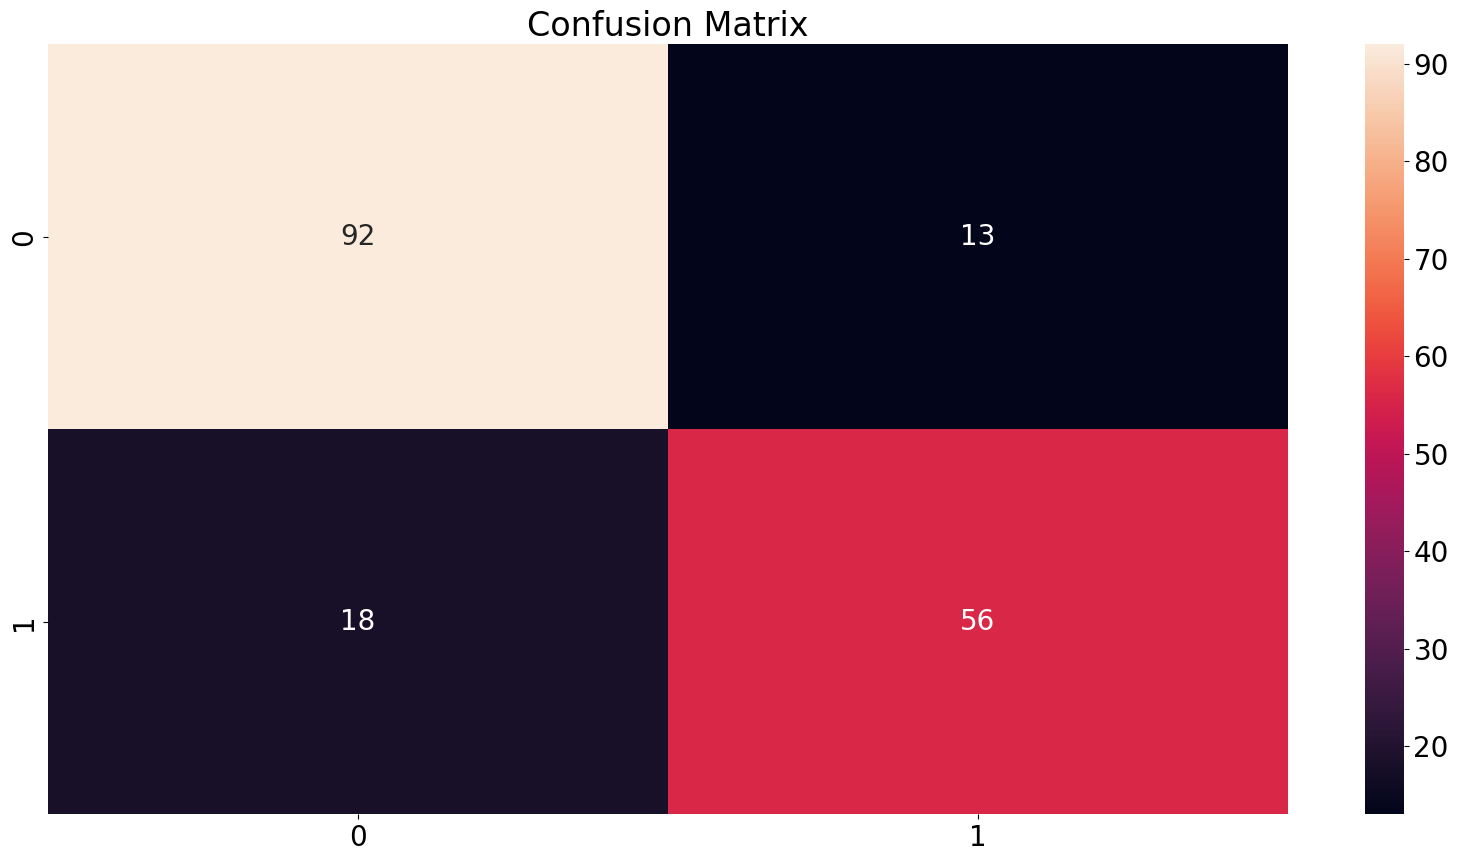

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()



## Generating results for submission

In [32]:
test_df

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Pclass_2,Pclass_3
0,892,0,0.428248,0,0,-0.286926,True,False,1,1,False,True
1,893,1,0.585323,1,0,-0.322838,False,True,2,0,False,True
2,894,0,0.773813,0,0,-0.206444,True,False,1,1,True,False
3,895,0,0.334004,0,0,-0.250836,False,True,1,1,False,True
4,896,1,0.271174,1,1,-0.093839,False,True,3,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0.375127,0,0,-0.277363,False,True,1,1,False,True
414,1306,1,0.484795,0,0,4.090404,False,False,1,1,False,False
415,1307,0,0.478512,0,0,-0.312011,False,True,1,1,False,True
416,1308,0,0.375127,0,0,-0.277363,False,True,1,1,False,True


In [33]:
test_df

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Pclass_2,Pclass_3
0,892,0,0.428248,0,0,-0.286926,True,False,1,1,False,True
1,893,1,0.585323,1,0,-0.322838,False,True,2,0,False,True
2,894,0,0.773813,0,0,-0.206444,True,False,1,1,True,False
3,895,0,0.334004,0,0,-0.250836,False,True,1,1,False,True
4,896,1,0.271174,1,1,-0.093839,False,True,3,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0.375127,0,0,-0.277363,False,True,1,1,False,True
414,1306,1,0.484795,0,0,4.090404,False,False,1,1,False,False
415,1307,0,0.478512,0,0,-0.312011,False,True,1,1,False,True
416,1308,0,0.375127,0,0,-0.277363,False,True,1,1,False,True


In [34]:
import pandas as pd

# Save the PassengerId for the submission file
passenger_ids = test_df['PassengerId']

# Drop the 'PassengerId' column for prediction
test_df = test_df.drop(['PassengerId'], axis=1)

# Make predictions using the trained model
predictions = voting_clf.predict(test_df)

# Create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)